# Preprocessing

In [1]:
# importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [2]:
# reading the csv file
df = pd.read_csv('movie.csv', encoding='utf-8')

In [3]:
# checking how many entries are present
len(df)

40000

In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
# replacing punctuations with an empty string
for column in df.columns:
    df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex = True)

In [6]:
df.head()

,text,label
0,I grew up b 1965 watching and loving the Thund...,0
1,When I put this movie in my DVD player and sat...,0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
# checking for any null values
df.isna().sum()

text     0
label    0
dtype: int64

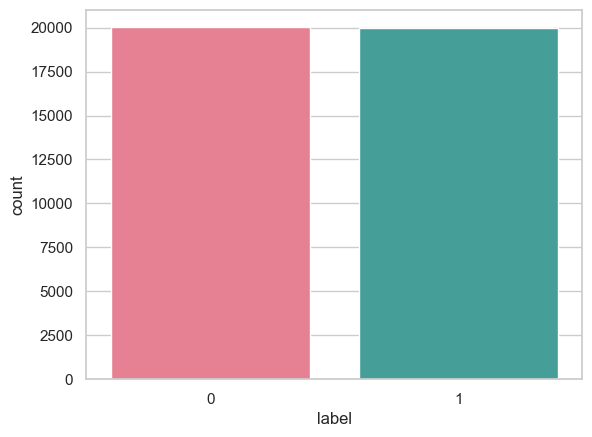

In [8]:
sns.set_theme(style="whitegrid")

# Define a color palette for each category
palette = sns.color_palette("husl", n_colors=len(df['label'].unique()))

# Assign the x variable to both `x` and `hue` and disable the legend
sns.countplot(x='label', data=df, hue='label', palette=palette, legend=False)

# Show the plot
plt.show()


# nltk remove stop words, tokenize, lemmatize

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omara\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omara\AppData\Roaming\nltk_data...


True

In [12]:
def cleanText(text):
    # turn into lower and remove punctuations 
    text = "".join([word.lower() for word in text if word not in string.punctuation])  
    
    # tokenize
    tweet_tokenizer = TweetTokenizer()
    tokens = (tweet_tokenizer.tokenize(text))
    
    # stop words
    stopWords = stopwords.words('english')
    stop_tokens = [token for token in tokens if token not in stopWords]
    
    # stemming
    lemma = WordNetLemmatizer()
    stemmed_tokens = [lemma.lemmatize(tokens) for tokens in stop_tokens]
    
    clean_text = " ".join(stemmed_tokens)
    return clean_text

In [13]:
df['clean_text'] = df['text'].apply(cleanText)

In [14]:
df

,text,label,clean_text
0,I grew up b 1965 watching and loving the Thund...,0,grew b 1965 watching loving thunderbird mate s...
1,When I put this movie in my DVD player and sat...,0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...
...,...,...,...
39995,Western Union is something of a forgotten clas...,1,western union something forgotten classic west...
39996,This movie is an incredible piece of work It e...,1,movie incredible piece work explores every noo...
39997,My wife and I watched this movie because we pl...,0,wife watched movie plan visit sicily stromboli...
39998,When I first watched Flatliners I was amazed I...,1,first watched flatliners amazed necessary feat...


# Sentiment Analysis

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [16]:
vectorizer = CountVectorizer(stop_words='english')

In [17]:
features = vectorizer.fit_transform(df['clean_text'])

In [18]:
features.shape

(40000, 148521)

In [19]:
vectorizer.vocabulary_

{'grew': 56753,
 '1965': 1194,
 'watching': 142605,
 'loving': 78281,
 'thunderbird': 132439,
 'mate': 81518,
 'school': 114788,
 'watched': 142582,
 'played': 100637,
 'lunch': 78710,
 'wanted': 142173,
 'virgil': 141135,
 'scott': 115145,
 'alan': 6320,
 'counting': 30558,
 'art': 10311,
 'form': 50706,
 'took': 133667,
 'child': 25044,
 'movie': 87001,
 'hoping': 62776,
 'glimpse': 54916,
 'loved': 78139,
 'bitterly': 16312,
 'disappointing': 37141,
 'high': 61201,
 'point': 101186,
 'snappy': 121501,
 'theme': 131262,
 'tune': 135849,
 'compare': 28240,
 'original': 94939,
 'score': 115085,
 'thankfully': 131032,
 'early': 40934,
 'saturday': 113931,
 'morning': 86494,
 'television': 130372,
 'channel': 24009,
 'play': 100617,
 'rerun': 109440,
 'series': 117127,
 'gerry': 54054,
 'anderson': 8002,
 'wife': 144557,
 'created': 31222,
 'jonatha': 70156,
 'frakes': 51133,
 'hand': 58687,
 'director': 36936,
 'chair': 23828,
 'version': 140420,
 'completely': 28371,
 'hopeless': 62759

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, df.label,
                                                   test_size=0.2, random_state=42)

In [21]:
X_train.shape

(32000, 148521)

In [22]:
X_test.shape

(8000, 148521)

In [23]:
NB = MultinomialNB()

In [25]:
NB.fit(X_train, y_train)

MultinomialNB()

In [26]:
expected = y_test
predicted = NB.predict(X_test)

In [27]:
from sklearn import metrics
NB_report = metrics.classification_report(expected, predicted)
print(NB_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3966
           1       0.88      0.84      0.86      4034

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [28]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

In [29]:
NB_cm = metrics.confusion_matrix(expected, predicted)
print(NB_cm)

[[3486  480]
 [ 653 3381]]


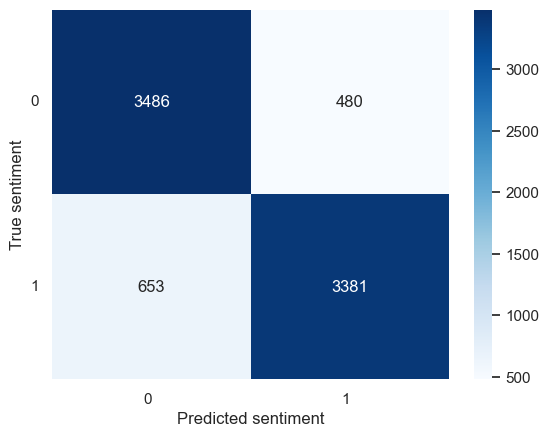

In [30]:
df_cm = pd.DataFrame(NB_cm)
show_confusion_matrix(df_cm)

In [31]:
import pickle

In [32]:
filename = 'naivebayes.sav'
pickle.dump(NB, open(filename, 'wb'))

In [33]:
filename2 = 'vector.sav'
pickle.dump(vectorizer, open(filename2, 'wb'))

In [34]:
x = ['this is a good movie', 'the movie is worst']
features = vectorizer.transform(x)

In [35]:
NB.predict(features)

array([0, 0], dtype=int64)